# A base de dados

### Carregando o dataset

In [1]:
#from google.colab import files
#files.upload()

In [2]:
import pandas as pd

dados = pd.read_csv('./data/Bicicletas.csv')

/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Conhecendo a base de dados

In [3]:
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [4]:
dados.shape

(731, 3)

In [5]:
import matplotlib.pyplot as plt

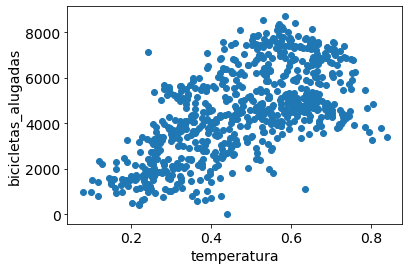

In [6]:
def plotar_dados(x, y, label_eixoX, indices=None):

    if indices is not None:
        plt.xticks(indices, fontsize=14)

    plt.rcParams.update({'font.size': 14})
    plt.scatter(x, y)
    plt.xlabel(label_eixoX)
    plt.ylabel('bicicletas_alugadas')



plotar_dados(dados['temperatura'], dados['bicicletas_alugadas'], label_eixoX='temperatura')

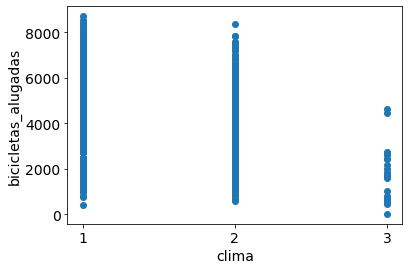

In [7]:
plotar_dados(dados['clima'], dados['bicicletas_alugadas'], label_eixoX='clima', indices=[1,2,3])

### Normalizando a base de dados

In [8]:
import numpy as np

In [9]:
y = dados['bicicletas_alugadas'].values

In [10]:
X = dados[['clima','temperatura']].values
print(X)

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 ...
 [2.       0.2424  ]
 [1.       0.2317  ]
 [2.       0.223487]]


In [11]:
X = X/np.amax(X,axis=0)
print(X)

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]


In [12]:
ymax=np.amax(y)
y = y/ymax
print(y[0:10])

[0.11303649 0.09192105 0.15480835 0.17925178 0.18361258 0.18430112
 0.17328437 0.11005279 0.09433096 0.15159513]


### Funções de ativação

In [13]:
sigmoid =  lambda valor: 1/(1+np.exp(-valor))

relu = lambda valor: np.maximum(0, valor)

### Criando a estrutura da rede

In [14]:
arquiteturas = []

arquitetura_1 = [
    {"dim_entrada": 2, "dim_saida": 50, "ativacao": "relu"},
    {"dim_entrada": 50, "dim_saida": 1, "ativacao": "sigmoid"}
]

arquitetura_2 = [
    {"dim_entrada": 2, "dim_saida": 4, "ativacao": "sigmoid"},
    {"dim_entrada": 4, "dim_saida": 1, "ativacao": "sigmoid"}
]

arquiteturas.append(arquitetura_1)
arquiteturas.append(arquitetura_2)

### Pesos e viés

In [15]:
def inicia_camadas(arquitetura, seed = 99):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

### Propagação da rede

In [16]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, bias_atual, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + bias_atual
    
    # selecção da função de ativação
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [17]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salca os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

### Testando a rede

In [18]:
#y_estimado[0,0]*ymax

In [19]:
#y[0]*ymax

### Atualização dos pesos

In [20]:
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

    return valores_parametros;

### Função de custo

In [21]:
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    
    return np.squeeze(custo)

### Retropropagação

In [22]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # numero de exemplos
    #m = Y.shape[1]
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        bias_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, 
            Pesos_atual, 
            bias_atual, 
            Saida_atual, 
            Ativado_anterior, 
            funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes

In [23]:
'''
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

'''

sigmoid_retro = lambda dAtivado, Saida : dAtivado * sigmoid(Saida) * (1 - sigmoid(Saida))


def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [24]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao is "relu":
        func_ativacao_retro = relu_retro
    elif ativacao is "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

### Treinamento

In [25]:
def treino(X, Y,X_teste,Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
   
    
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede - Foward propagation
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        
        Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
        historia_custo_teste.append(custo_teste)
        
        
        # Retropropagação - Backpropagation
        gradientes = retropropagacao_total(Y_predito, Y, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 50 == 0):
            
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))
            
            
    return valores_parametros, historia_custo, historia_custo_teste

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.43, random_state=42)

In [28]:
def testar_arquiteturas(epocas=1000, taxa_aprendizagem=0.01):
    treinamentos = []

    for arquitetura in arquiteturas:
        # Treinamento
        valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino),
                                                                          np.transpose(
                                                                              y_treino.reshape((y_treino.shape[0], 1))),
                                                                          np.transpose(X_teste),
                                                                          np.transpose(
                                                                              y_teste.reshape((y_teste.shape[0], 1))),
                                                                          arquitetura,
                                                                          epocas,
                                                                          taxa_aprendizagem)

        treinamento = {}
        treinamento['parametros'] = valores_parametros
        treinamento['historia_custo'] = historia_custo
        treinamento['historia_custo_teste'] = historia_custo_teste

        treinamentos.append(treinamento)

    return treinamentos

In [29]:
def plotar_funcao_custo(historia_custo, historia_custo_teste):
    plt.plot(historia_custo)
    plt.plot(historia_custo_teste, 'r')
    plt.legend(['Treinamento','Teste'])
    plt.ylabel('Custo')
    plt.xlabel('Épocas')
    plt.show()


treinamentos = testar_arquiteturas(epocas=20000, taxa_aprendizagem=0.05)

Iteração: 00000 - custo: 0.69396 
Iteração: 00050 - custo: 0.68938 
Iteração: 00100 - custo: 0.68735 
Iteração: 00150 - custo: 0.68575 
Iteração: 00200 - custo: 0.68425 
Iteração: 00250 - custo: 0.68271 
Iteração: 00300 - custo: 0.68113 
Iteração: 00350 - custo: 0.67949 
Iteração: 00400 - custo: 0.67780 
Iteração: 00450 - custo: 0.67605 
Iteração: 00500 - custo: 0.67425 
Iteração: 00550 - custo: 0.67240 
Iteração: 00600 - custo: 0.67052 
Iteração: 00650 - custo: 0.66863 
Iteração: 00700 - custo: 0.66672 
Iteração: 00750 - custo: 0.66483 
Iteração: 00800 - custo: 0.66297 
Iteração: 00850 - custo: 0.66117 
Iteração: 00900 - custo: 0.65944 
Iteração: 00950 - custo: 0.65779 
Iteração: 01000 - custo: 0.65624 
Iteração: 01050 - custo: 0.65480 
Iteração: 01100 - custo: 0.65347 
Iteração: 01150 - custo: 0.65225 
Iteração: 01200 - custo: 0.65115 
Iteração: 01250 - custo: 0.65016 
Iteração: 01300 - custo: 0.64929 
Iteração: 01350 - custo: 0.64852 
Iteração: 01400 - custo: 0.64781 
Iteração: 0145

Iteração: 12250 - custo: 0.63848 
Iteração: 12300 - custo: 0.63846 
Iteração: 12350 - custo: 0.63845 
Iteração: 12400 - custo: 0.63843 
Iteração: 12450 - custo: 0.63842 
Iteração: 12500 - custo: 0.63840 
Iteração: 12550 - custo: 0.63839 
Iteração: 12600 - custo: 0.63838 
Iteração: 12650 - custo: 0.63836 
Iteração: 12700 - custo: 0.63835 
Iteração: 12750 - custo: 0.63833 
Iteração: 12800 - custo: 0.63832 
Iteração: 12850 - custo: 0.63830 
Iteração: 12900 - custo: 0.63829 
Iteração: 12950 - custo: 0.63827 
Iteração: 13000 - custo: 0.63826 
Iteração: 13050 - custo: 0.63825 
Iteração: 13100 - custo: 0.63823 
Iteração: 13150 - custo: 0.63822 
Iteração: 13200 - custo: 0.63820 
Iteração: 13250 - custo: 0.63819 
Iteração: 13300 - custo: 0.63818 
Iteração: 13350 - custo: 0.63816 
Iteração: 13400 - custo: 0.63815 
Iteração: 13450 - custo: 0.63813 
Iteração: 13500 - custo: 0.63812 
Iteração: 13550 - custo: 0.63811 
Iteração: 13600 - custo: 0.63809 
Iteração: 13650 - custo: 0.63808 
Iteração: 1370

Iteração: 04850 - custo: 0.68751 
Iteração: 04900 - custo: 0.68738 
Iteração: 04950 - custo: 0.68725 
Iteração: 05000 - custo: 0.68711 
Iteração: 05050 - custo: 0.68697 
Iteração: 05100 - custo: 0.68682 
Iteração: 05150 - custo: 0.68667 
Iteração: 05200 - custo: 0.68651 
Iteração: 05250 - custo: 0.68635 
Iteração: 05300 - custo: 0.68618 
Iteração: 05350 - custo: 0.68601 
Iteração: 05400 - custo: 0.68584 
Iteração: 05450 - custo: 0.68566 
Iteração: 05500 - custo: 0.68547 
Iteração: 05550 - custo: 0.68528 
Iteração: 05600 - custo: 0.68508 
Iteração: 05650 - custo: 0.68488 
Iteração: 05700 - custo: 0.68467 
Iteração: 05750 - custo: 0.68446 
Iteração: 05800 - custo: 0.68424 
Iteração: 05850 - custo: 0.68401 
Iteração: 05900 - custo: 0.68378 
Iteração: 05950 - custo: 0.68354 
Iteração: 06000 - custo: 0.68330 
Iteração: 06050 - custo: 0.68304 
Iteração: 06100 - custo: 0.68279 
Iteração: 06150 - custo: 0.68252 
Iteração: 06200 - custo: 0.68225 
Iteração: 06250 - custo: 0.68198 
Iteração: 0630

Iteração: 16900 - custo: 0.64251 
Iteração: 16950 - custo: 0.64250 
Iteração: 17000 - custo: 0.64248 
Iteração: 17050 - custo: 0.64247 
Iteração: 17100 - custo: 0.64246 
Iteração: 17150 - custo: 0.64245 
Iteração: 17200 - custo: 0.64243 
Iteração: 17250 - custo: 0.64242 
Iteração: 17300 - custo: 0.64241 
Iteração: 17350 - custo: 0.64239 
Iteração: 17400 - custo: 0.64238 
Iteração: 17450 - custo: 0.64237 
Iteração: 17500 - custo: 0.64236 
Iteração: 17550 - custo: 0.64234 
Iteração: 17600 - custo: 0.64233 
Iteração: 17650 - custo: 0.64232 
Iteração: 17700 - custo: 0.64231 
Iteração: 17750 - custo: 0.64230 
Iteração: 17800 - custo: 0.64228 
Iteração: 17850 - custo: 0.64227 
Iteração: 17900 - custo: 0.64226 
Iteração: 17950 - custo: 0.64225 
Iteração: 18000 - custo: 0.64224 
Iteração: 18050 - custo: 0.64223 
Iteração: 18100 - custo: 0.64221 
Iteração: 18150 - custo: 0.64220 
Iteração: 18200 - custo: 0.64219 
Iteração: 18250 - custo: 0.64218 
Iteração: 18300 - custo: 0.64217 
Iteração: 1835

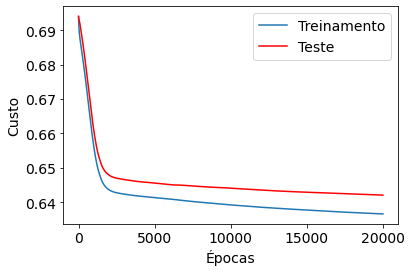

In [30]:
plotar_funcao_custo(treinamentos[0]['historia_custo'], treinamentos[0]['historia_custo_teste'])

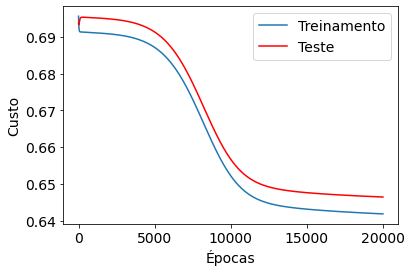

In [31]:
plotar_funcao_custo(treinamentos[1]['historia_custo'], treinamentos[1]['historia_custo_teste'])

### Fazendo Previsões

In [32]:
# Previsão arquitetura 1
Y_pred_1, _1 = propaga_total(np.transpose(X_teste), treinamentos[0]['parametros'], arquiteturas[0])
# Previsão arquitetura 2
Y_pred_2, _2 = propaga_total(np.transpose(X_teste), treinamentos[1]['parametros'], arquiteturas[1])

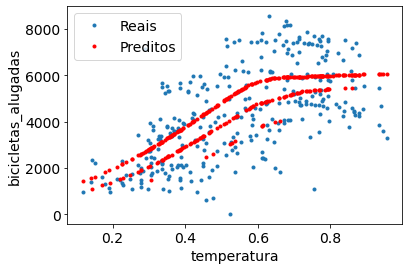

In [34]:
def plotar_previsoes_by_temperatura(Y_predito, criterio_X):

    if criterio_X == 'temperatura':
        indice_X = 1
    if criterio_X == 'clima':
        indice_X = 0
        plt.rcParams.update({'font.size': 22})
        indice=[1,2,3]
        plt.xticks(indice, fontsize=14)
   

    plt.plot(np.transpose(X_teste)[indice_X],ymax*y_teste,'.')
    plt.plot(np.transpose(X_teste)[indice_X],ymax*Y_predito.reshape([-1,1]),'.r')
    plt.legend(['Reais','Preditos'])
    plt.ylabel('bicicletas_alugadas')
    plt.xlabel(criterio_X)
    plt.show()
    
plotar_previsoes_by_temperatura(Y_pred_1, 'temperatura')

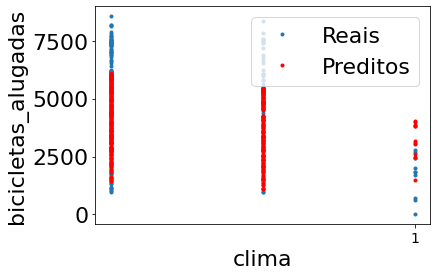

In [35]:
plotar_previsoes_by_temperatura(Y_pred_1, 'clima')

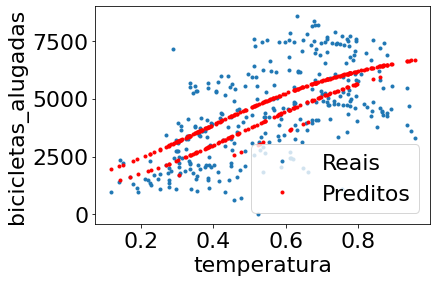

In [37]:
plotar_previsoes_by_temperatura(Y_pred_2, 'temperatura')

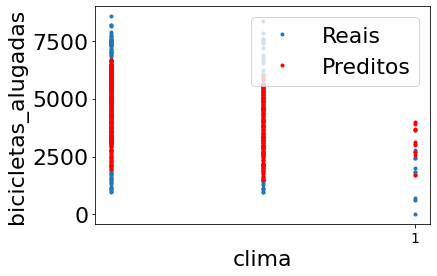

In [38]:
plotar_previsoes_by_temperatura(Y_pred_2, 'clima')